# QE DANA KARWAS
## DATA:
The average weekday ridership is indicative of the number of transit patrons making a one-way trip on any mode per weekday. This number is estimated and excludes holidays.

DATA SOURCE:
https://data.maryland.gov/Transportation/MTA-Average-Weekday-Ridership-by-Month/ub96-xxqw

In [2]:
import matplotlib
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as pl
import matplotlib.dates as dates
import seaborn
from __future__  import print_function, division
import pylab as pl
import os
%pylab inline
import csv
import requests
import zipfile
import statsmodels.api as sm
from pylab import rcParams



%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/envs/p3env/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Get the Data

In [3]:
os.getenv("PUIDATA") 

'/Users/fbianco/science/Dropbox/UI/PUIdata'

In [5]:
#read in the data
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + 'MTA_Month.csv')


FBB to make your notebook reproducible you should have either extracted the data from the URL directly online, or given information on the link. This is not a big deal in this context, but dont forget your good coding/science practices !

In [6]:
#check data info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 15 columns):
Month                              132 non-null object
Bus                                132 non-null int64
Metro                              132 non-null int64
Light Rail                         132 non-null int64
Mobility                           132 non-null int64
Taxi Access                        132 non-null int64
MARC Total                         120 non-null float64
MARC - Brunswick                   120 non-null float64
MARC - Camden                      120 non-null float64
MARC - Penn                        120 non-null float64
Commuter Bus Total                 78 non-null float64
CB - Baltimore                     78 non-null float64
CB - Washington                    78 non-null float64
CB - ICC                           76 non-null float64
Total Average Weekday Ridership    132 non-null int64
dtypes: float64(8), int64(6), object(1)
memory usage: 15.5+ KB


In [7]:
df1.head(5)

,Month,Bus,Metro,Light Rail,Mobility,Taxi Access,MARC Total,MARC - Brunswick,MARC - Camden,MARC - Penn,Commuter Bus Total,CB - Baltimore,CB - Washington,CB - ICC,Total Average Weekday Ridership
0,Jul-06,205015,43358,22997,2838,1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275280
1,Aug-06,215455,44427,22708,2860,1162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286612
2,Sep-06,251719,44062,24085,2985,1211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324062
3,Oct-06,251749,45510,22773,3055,1184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324271
4,Nov-06,247152,43469,22846,2997,1192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317656


In [8]:
#drop what we do not need
df1.drop([u'MARC Total', u'MARC - Brunswick', u'MARC - Camden', u'MARC - Penn',
       u'Commuter Bus Total', u'CB - Baltimore', u'CB - Washington',
       u'CB - ICC'], axis=1, inplace=True)

# FBB good to remove the data you do not need

In [9]:
#get column headers
df1.columns

Index(['Month', 'Bus', 'Metro', 'Light Rail', 'Mobility', 'Taxi Access',
       'Total Average Weekday Ridership'],
      dtype='object')

In [10]:
df1.head()

,Month,Bus,Metro,Light Rail,Mobility,Taxi Access,Total Average Weekday Ridership
0,Jul-06,205015,43358,22997,2838,1072,275280
1,Aug-06,215455,44427,22708,2860,1162,286612
2,Sep-06,251719,44062,24085,2985,1211,324062
3,Oct-06,251749,45510,22773,3055,1184,324271
4,Nov-06,247152,43469,22846,2997,1192,317656


In [11]:
#Not sure why this is not working, possibly because it has to be in the index?
#df1['Month'] = pd.to_datetime(df1['Month'], format='%Y-%m')
#df1['Month']=pd.to_datetime(df1.Year)

FBB datetime conversion is tricky, and differnt versions of pandas work differently about it. the PUI kernels would have the latest version, but earlier versions of pandas do not have the pd.to_datetime() function. I do not see what your error is, but it is likely that.

In [12]:
#make the Month the index
df1.set_index('Month', inplace=True)

In [13]:
df1.head(2)

,Bus,Metro,Light Rail,Mobility,Taxi Access,Total Average Weekday Ridership
Month,,,,,,
Jul-06,205015,43358,22997,2838,1072,275280
Aug-06,215455,44427,22708,2860,1162,286612


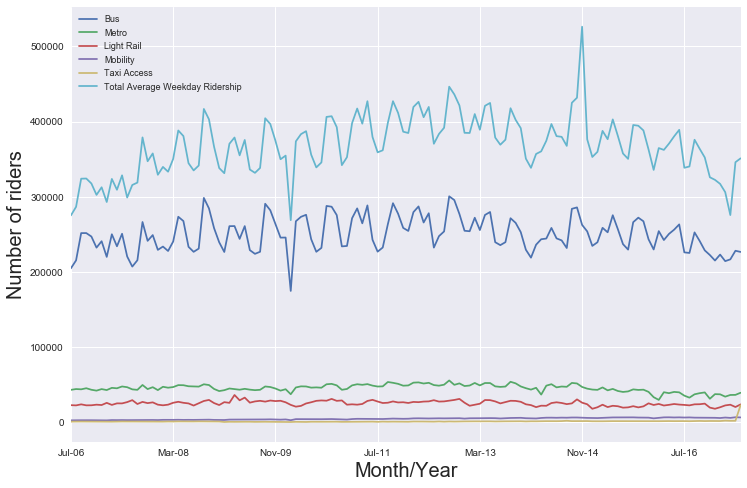

In [14]:
df1.plot(figsize=(12,8))
pl.xlabel("Month/Year", fontsize=20)
pl.ylabel('Number of riders', fontsize=20)
pl.legend(fontsize=9)
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix(data, figsize=(25,25));

FBB If you normalized the time series they would all be visible, and differences among them would be more interesting to see than this plot. Here most of what one can see is that some time series have significantly larger average than others, and that the total and Bus are strongly correlated, but Total contains (and it is dominated by) bus so that is not very interesting.

## A Scatter Matrix of the Ridership

/Users/fbianco/Library/Enthought/Canopy_64bit/User/envs/p3env/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  from ipykernel import kernelapp as app


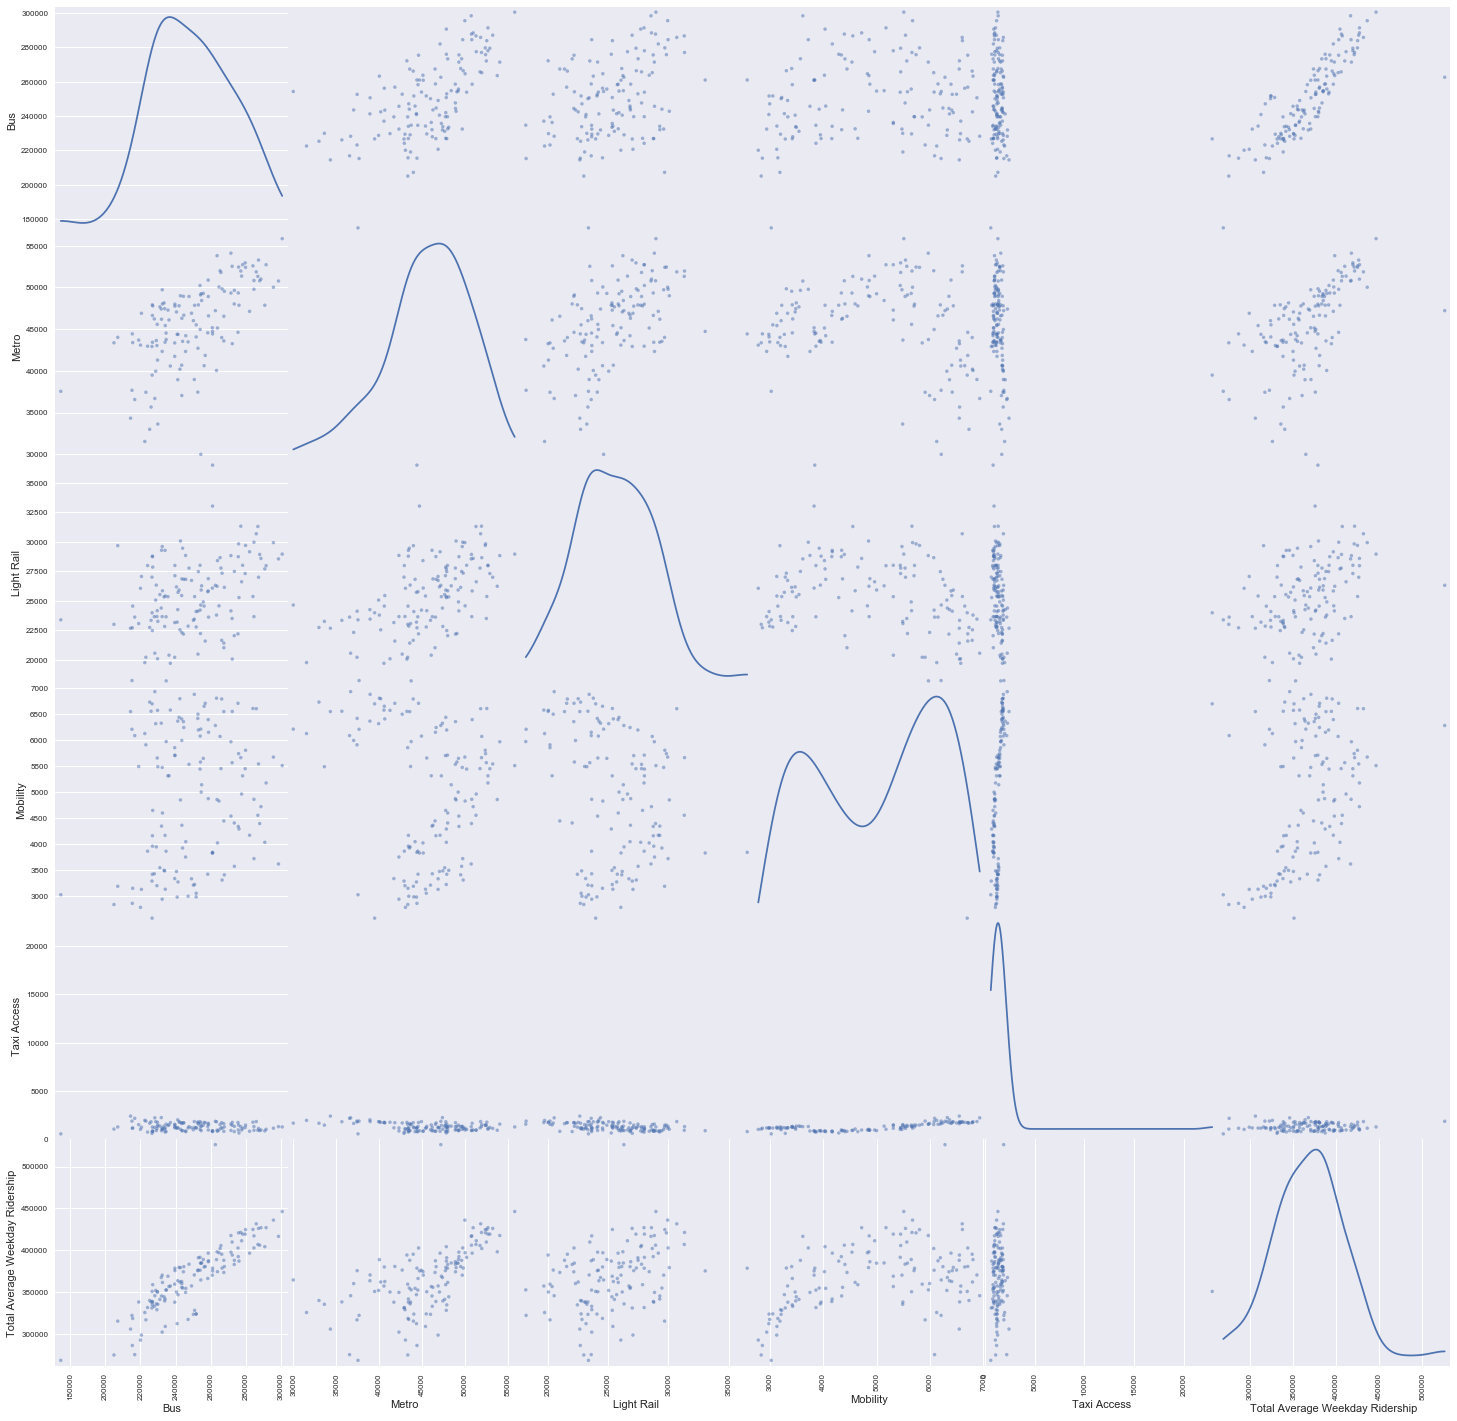

In [15]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df1, figsize=(25,25), diagonal="density");

A scatter matrix tells us that the ridership is generally correlated, with a few exceptions: taxi and mobility, and less so light rail. It is a good idea to make it, but you should draw some conclusions from it: where are your captions?


In [16]:
df1.columns

Index(['Bus', 'Metro', 'Light Rail', 'Mobility', 'Taxi Access',
       'Total Average Weekday Ridership'],
      dtype='object')

## Some stuff to try

In [66]:
# not sure why the index is starting a column lower

FBB the index has a name, that is why it is displayed like that with the column offset. that is irrelevant in the analysis, just a display option

In [67]:
# need to figure out how to convert the month year format to datetime format and am getting some trouble

FBB You could have not worried about that at all! You know the starting date, and you know that the data has a monthly cadence. Everything you do you can do using a dummy index and then calculating the corresponding date!

In [68]:
#cannot get this to work, but this is where i was headed........
df1['Month'] =  pd.to_datetime(df1['Month'], format='%m-%Y')


Identify the rolling mean

In [ ]:
#becasue I can't ge the datetime thingy to work I am going to supplement with an MTA dataset with the differetnt
#types of card swipes from our homework.

In [69]:
data = np.load('MTA_Fare.npy').astype(float)
data[data == -1] = float('nan')means = np.nanmean(data, axis=2)


In [70]:
# get the means and sigmas for the standard deviation
means = np.nanmean(data, axis=2)
sigmas = np.nanstd(data, axis=2)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1147: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


In [71]:
#figure out the thresholds that are three sigmas above and below the mean
thresholds = [np.array(means - 3 * sigmas), np.array(means + 3 * sigmas)]

In [73]:
#this is splicing together the threshods - specifying whether we want the lower or upper threshold and the station & card pair, 
#i.e. if we want the lower threshold for station 0 and card type 0, it is:
thresholds[0][0,0]

5303.6092999939428

In [75]:
#set the time axis for which I could not get to work above
start = np.datetime64('2010-05-21')
time = [(start + np.timedelta64(event_weeks + 1, 'W')).astype(dt.datetime) for event_weeks in range(194)] 

In [ ]:
pl.figure(figsize = (15, 5))
for station in range(data.shape[0]):
    for card in range(data.shape[1]):
        pl.semilogy(time, data[station, card,:])
pl.xlabel('Weeks since 05/21/2010')
pl.ylabel('Swipes (log10)')

In [ ]:
#some other stuff I was going to try, if I had the time series into a np....

In [29]:
new_data = np.nansum(df1, axis=1).astype(int)


## FBB you were moving in the right direction and the lines of code you have are the relevant ones, but you missed something obvious: since the cadence of the data is regular you do not need the datetime column for your analysis: do the analysis based on a dummy index (0,1,2,...) and then when you find the index of the event just calculate the date: if it is the 41th month from the first date it is 3 years and 5 months after July 06: November 09



https://en.wikipedia.org/wiki/February_5%E2%80%936,_2010_North_American_blizzard

this link appears as the second result of a google search "Washington DC February 2010 events"

In fact you could even have seen it in the first plot you made. Since I commented "the anomaly is obvious, and you can spot it by eye." and "if time allows" do all the rigorous steps, it would have been good to see you do the intellectua exercise of identifying the anomaly and the couse of it by just looking at the plot, as recommanded, before you crowled into the rabbit hole of the rigorous analysis: remember to work iteratively!

Obtaining and reading in data: 33/33 of the whole grade

Q1: outlier event: 20/33 of the whole grade - you had a plan for identifying the event, you knew where to extract the relevant lines of code. But you got too cought up with what was not working and you did not see the obvious: you could just complete Q1 after making the first plot by a simple internet search. 

Q2: not done: 0/33

 +10 for remembering you put it in PUIDATA and since you had issues with the pandas version but you had the right function call to conver the data

Total 63/100